In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

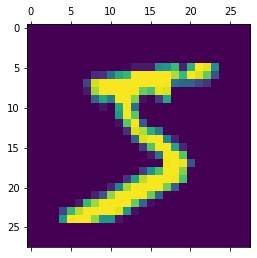

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.4708 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.3045 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.2831 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 794us/step - loss: 0.2665 - accuracy: 0.9253


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 676us/step - loss: 0.2664 - accuracy: 0.9252


[0.26635846495628357, 0.9251999855041504]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1520972e-02, 2.2100829e-07, 2.9327601e-02, 9.5308268e-01,
       2.9903948e-03, 9.9860251e-02, 1.5499855e-06, 9.9979985e-01,
       1.1700559e-01, 5.4036653e-01], dtype=float32)

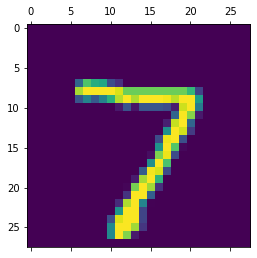

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  912,   16,   11,    5,   13,   13,   44,    2],
       [   4,    0,   16,  919,    0,   25,    2,   13,   26,    5],
       [   2,    1,    2,    1,  925,    0,   11,    4,   11,   25],
       [   9,    3,    3,   30,   10,  776,   16,    6,   33,    6],
       [  12,    3,    7,    1,    8,   10,  911,    2,    4,    0],
       [   2,    5,   20,    7,    8,    0,    0,  959,    6,   21],
       [   5,    5,    5,   18,    9,   21,   10,   13,  885,    3],
       [  10,    7,    1,    9,   35,    6,    0,   33,   13,  895]])>

Text(69.0, 0.5, 'Truth')

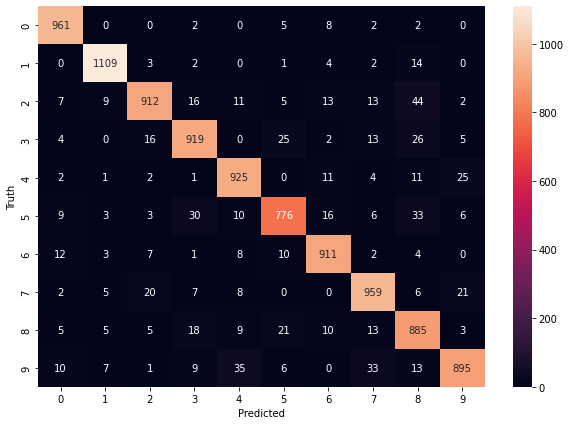

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1211 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0653 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0504 - accuracy: 0.9849


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 907us/step - loss: 0.0775 - accuracy: 0.9766


[0.07748796045780182, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

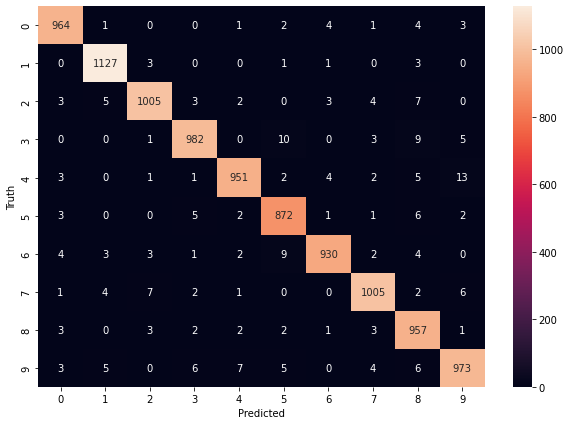

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1290 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0906 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0693 - accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0553 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0301 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.021

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9761


[0.08556292206048965, 0.9761000275611877]